# Machine Learning Project (ML-2025): Heart Disease Risk Prediction

Data & AI

Nassim LOUDIYI, Paul-Adrien LU-YEN-TUNG 

Objective: Predict the presence of heart disease using classification models and SHAP interpretability.

## 1. Business Case & Objectives
This section defines the problem, the main objective, and the connection to our specialization, following the ESILV "Grade Details – Report" criteria.

### 1.1. Problem Definition
Cardiovascular diseases (CVDs) are the **leading cause of mortality worldwide**, responsible for nearly **18 million deaths each year** according to the WHO.  
Early and accurate diagnosis of heart disease remains a major challenge in healthcare.  
Clinicians must analyze numerous clinical factors — such as age, blood pressure, cholesterol level, and ECG results — to estimate a patient’s cardiac risk.  
This process is complex, time-consuming, and can vary depending on the physician’s interpretation.

### 1.2. Project Objective
The goal of this project is to build a **decision-support system** that can assist healthcare professionals by predicting the presence (`target = 1`) or absence (`target = 0`) of heart disease from 13 measurable clinical attributes.  
We will compare multiple Machine Learning algorithms — from **standard models (Logistic Regression)** to **advanced ones (Random Forest, XGBoost)** — and select the most reliable based on key evaluation metrics (accuracy, recall, ROC-AUC).  
The model’s interpretability will also be analyzed using **SHAP values**, ensuring transparency and clinical trust.

### 1.3. Link to Specialization (Data & Artificial Intelligence)
This project fully aligns with our Major:
- **Data Analysis & Preprocessing:** exploration, cleaning, and transformation of real-world medical data.  
- **Modeling & Comparison:** implementation of standard and ensemble models.  
- **Optimization:** hyperparameter tuning using *GridSearchCV* to enhance performance.  
- **Interpretability (Trustworthy AI):** explaining model predictions using *SHAP* values — a recognized scientific method widely used in medical AI research.

Overall, this project combines **technical rigor and societal impact**, perfectly illustrating the use of Data & AI to support evidence-based medical decisions.


## 2. Dataset Description


### 2.1. Structure
The dataset contains **303 patient records (rows)** and **14 columns (features)** in total.

- **Target variable:** `condition` →  
  - `0` = No Heart Disease  
  - `1` = Presence of Heart Disease  

- **Features:** 13 clinical and physiological attributes describing each patient (see table below).

---

### 2.2. Feature Dictionary
The table below summarizes all variables included in the dataset:

| Feature | Description | Type |
| :--- | :--- | :--- |
| `age` | Age in years | Continuous |
| `sex` | Gender (1 = Male; 0 = Female) | Categorical |
| `cp` | Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) | Categorical |
| `trestbps` | Resting blood pressure (in mm Hg) | Continuous |
| `chol` | Serum cholesterol (in mg/dl) | Continuous |
| `fbs` | Fasting blood sugar > 120 mg/dl (1 = True; 0 = False) | Binary |
| `restecg` | Resting electrocardiographic results (0 = normal, 1 = ST-T abnormality, 2 = left ventricular hypertrophy) | Categorical |
| `thalach` | Maximum heart rate achieved | Continuous |
| `exang` | Exercise-induced angina (1 = Yes; 0 = No) | Binary |
| `oldpeak` | ST depression induced by exercise relative to rest | Continuous |
| `slope` | Slope of the peak exercise ST segment (0 = downsloping, 1 = flat, 2 = upsloping) | Categorical |
| `ca` | Number of major vessels (0–3) colored by fluoroscopy | Categorical |
| `thal` | Thalassemia (0 = normal; 1 = fixed defect; 2 = reversible defect) | Categorical |
| **`target`** | **Target variable indicating presence of heart disease (0 = No, 1 = Yes)** | **Target**


## 3. Project Plan

The project follows the **three-step structure** recommended by the official *Machine Learning Project Guidelines (ESILV, 2025)*.  
Each step builds upon the previous one, gradually improving performance, reliability, and interpretability.

---

### Step 1: Exploratory Data Analysis (EDA), Preprocessing & Baseline Model
This phase aims to understand the dataset and establish a performance benchmark.

- Conduct **Exploratory Data Analysis (EDA)** to examine distributions, correlations, and potential data issues.  
- Perform **basic preprocessing** (scaling, encoding, train–test split).  
- Train a **baseline model (Logistic Regression)** to obtain initial metrics.  
- Evaluate the baseline using *Accuracy, Recall, F1-score,* and *ROC-AUC.*

This first model will also serve as a reference for interpretability, since Logistic Regression provides directly understandable coefficients.

---

### Step 2: Model Comparison & Optimization
In this stage, several models are compared to determine which offers the best trade-off between accuracy and explainability.

- Extend preprocessing with a **pipeline** using `ColumnTransformer`.  
- Train and compare **Logistic Regression**, **Random Forest**, and **XGBoost**.  
- Apply **GridSearchCV** for hyperparameter tuning.  
- Use cross-validation and consistent metrics for evaluation.

The objective is not necessarily to find the most complex model but to identify the one that performs best **while remaining interpretable and reliable for medical use**.

---

### Step 3: Interpretability (SHAP) & Conclusion
The final phase focuses on explainability and critical evaluation.

- Apply **SHAP** to the best-performing model (which could still be Logistic Regression if it remains competitive).  
- Visualize **global and local feature importance** and discuss medical relevance.  
- Analyze the **trade-off between model complexity, accuracy, and interpretability**.  
- Conclude with insights, limitations, and improvement perspectives.

This structure allows objective comparison between classical and advanced algorithms, with final selection based on both quantitative performance and clinical interpretability.


## Step 1: Exploratory Data Analysis (EDA), Preprocessing & Baseline Model

**Objective:**  
This step focuses on analyzing, visualizing, and preparing the *Cleveland Heart Disease* dataset.  
We aim to understand the data structure, detect potential correlations or imbalances, and establish a first benchmark using a simple yet interpretable baseline model (*Logistic Regression*).


- **Dataset analysis:** statistical overview, graphical exploration, correlation matrix, and class balance evaluation.  
- **Data preprocessing:** handling data types, feature scaling, and creation of train/test splits to ensure fair model evaluation.  
- **Baseline model:** implementation of a first supervised learning algorithm (Logistic Regression) to provide a reference performance level for future comparisons.

This stage ensures a clear understanding of the dataset’s characteristics and sets a measurable starting point for the subsequent modeling and optimization phases.

#### 1.1. Import Librairies

In [1]:
# Import all necessary libraries for Step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Sklearn metrics for evaluation
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve
)

# Set global plot style
sns.set(style="whitegrid")


#### 1.2. Load and Inspect Data

In [2]:
# Load dataset
df = pd.read_csv("Heart_disease_cleveland_new.csv")

# Basic overview
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
print("First five rows:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nSummary statistics:")
display(df.describe().T)

Shape: 303 rows × 14 columns

First five rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,2.158416,0.960126,0.0,2.0,2.0,3.0,3.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### 1.3. Data Quality and Target Analysis

Total missing values: 0
Total duplicated rows: 0

--- Target Variable Distribution ---


,count,percent
target,,
0,164,54.13
1,139,45.87


C:\Users\paull\AppData\Local\Temp\ipykernel_19692\2344912048.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="target", data=df, palette="pastel", legend=False)


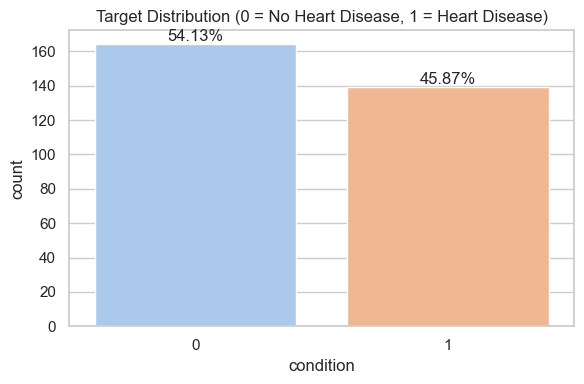

In [3]:
# Missing values and duplicates
total_missing = df.isnull().sum().sum()
total_dupes = df.duplicated().sum()
print(f"Total missing values: {total_missing}")
print(f"Total duplicated rows: {total_dupes}")

# Target distribution ('condition')
print("\n--- Target Variable Distribution ---")
target_counts = df['target'].value_counts().sort_index()
target_pct = (target_counts / target_counts.sum() * 100).round(2)
target_table = pd.DataFrame({"count": target_counts, "percent": target_pct})
display(target_table)

# 3) Visualize target distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="target", data=df, palette="pastel", legend=False)
plt.title("Target Distribution (0 = No Heart Disease, 1 = Heart Disease)")
plt.xlabel("condition")
plt.ylabel("count")

# annotate bars with percentages
for p, pct in zip(ax.patches, target_pct.tolist()):
    ax.annotate(f"{pct}%", (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")

plt.tight_layout()
plt.savefig("step1_target_distribution.png", dpi=150)
plt.show()


**Analysis:**

There are 0 missing values and 0 duplicates.
The target is well-balanced: ~54.13% "No Disease" (0) and ~45.87% "Disease" (1). We won't need complex resampling techniques (like SMOTE) for our baseline model.


#### 1.4. EDA: Feature Visualization

--- Visualizing Continuous Features ---


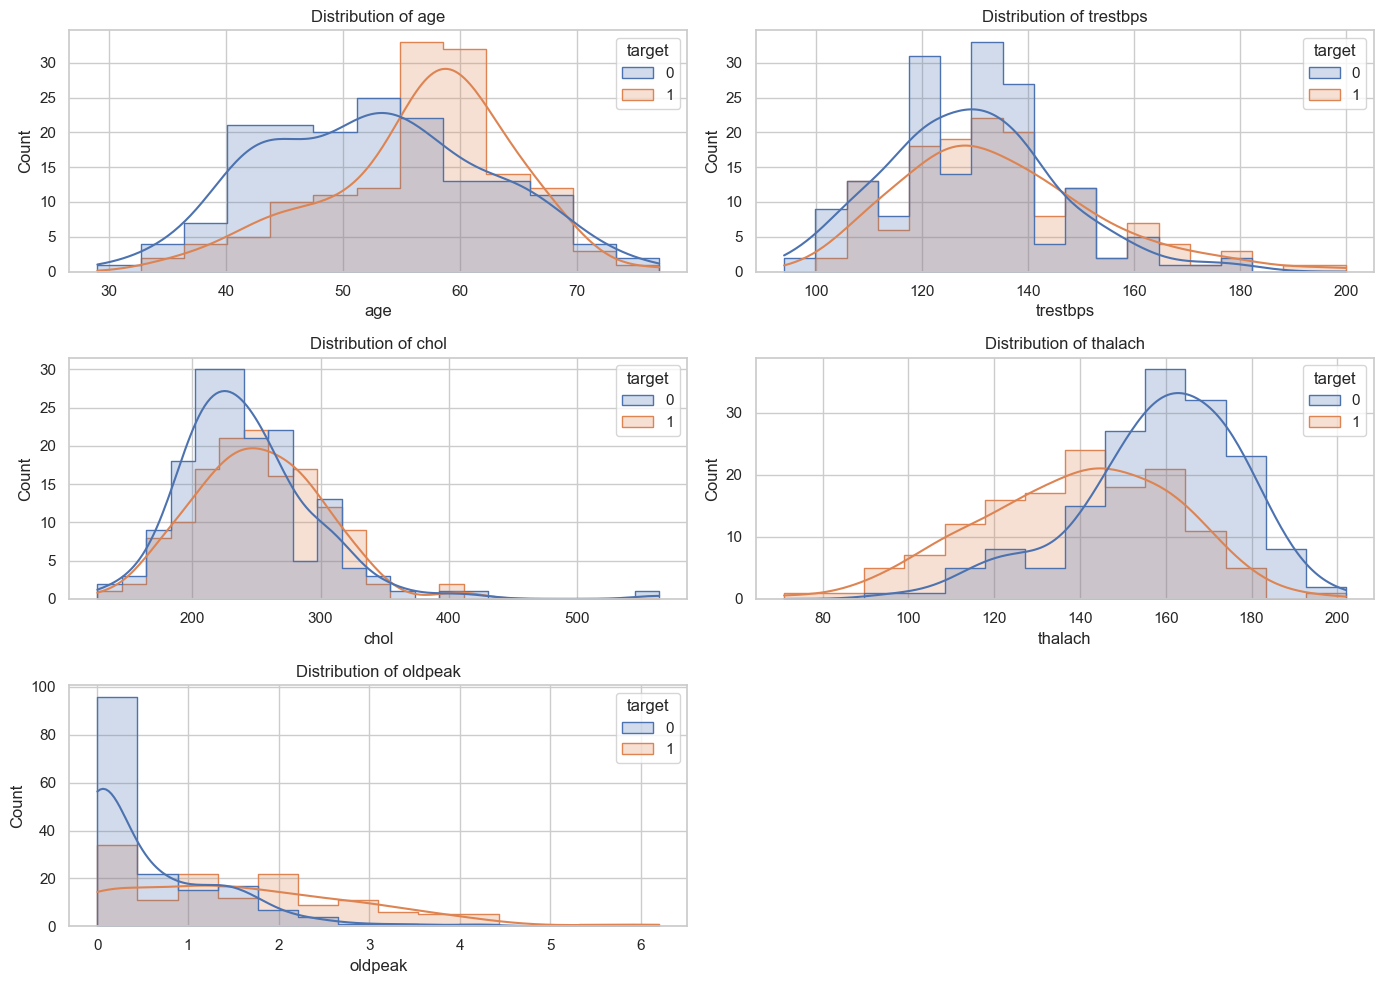


--- Visualizing Categorical Features ---


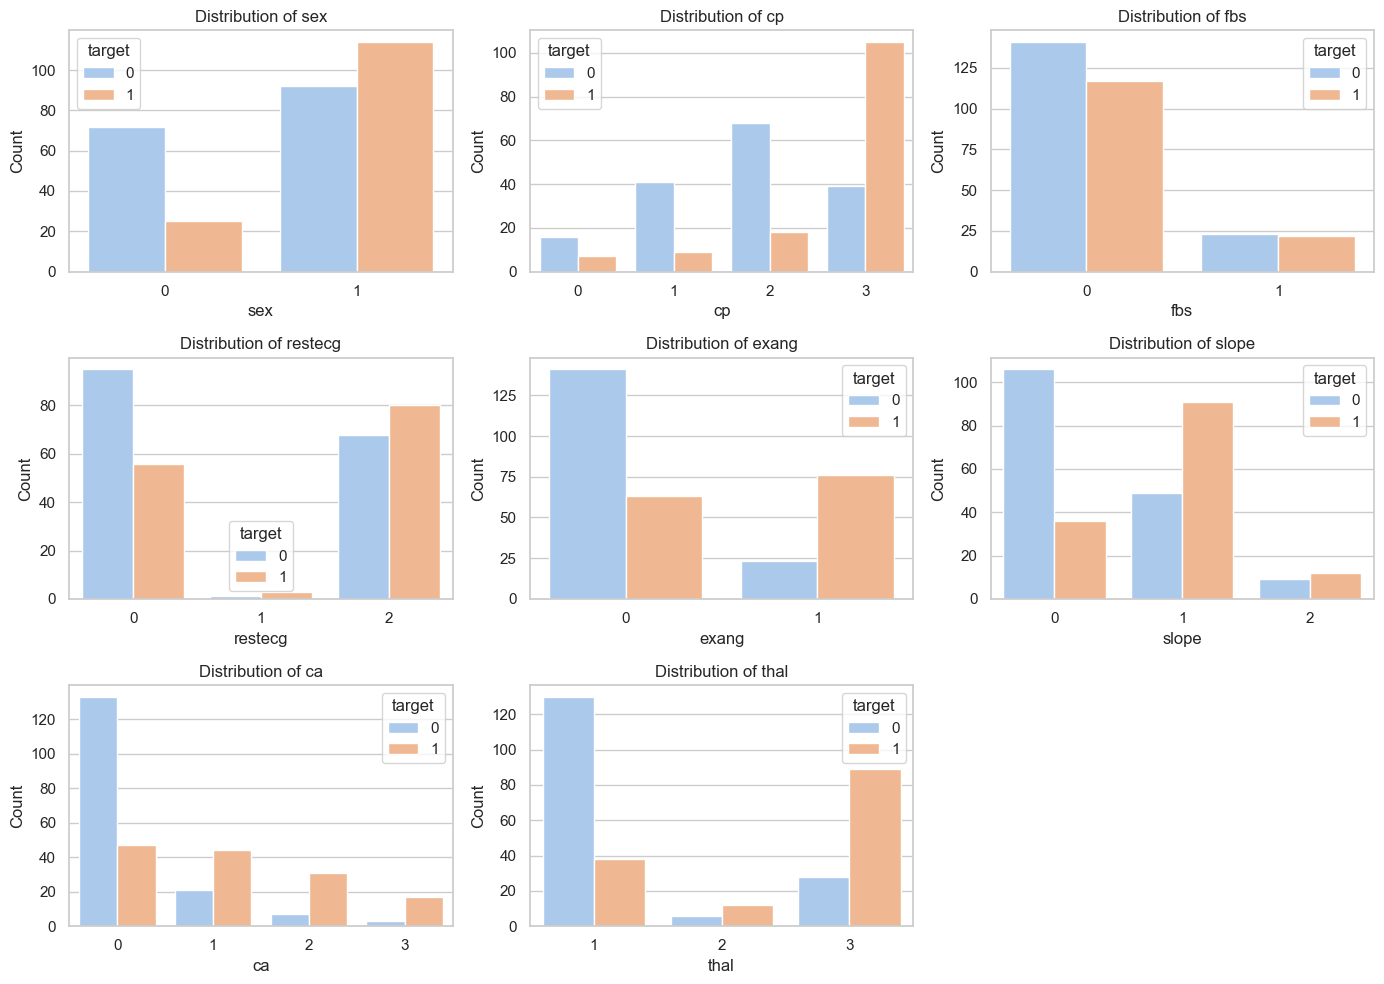

In [4]:
# Define feature types
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Plot 1: Histograms for continuous features
print("--- Visualizing Continuous Features ---")
plt.figure(figsize=(14, 10))

for i, col in enumerate(continuous_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, hue='target', kde=True, element='step')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.savefig("step1_continuous_features.png", dpi=150)
plt.show()

# Plot 2: Count plots for categorical features
print("\n--- Visualizing Categorical Features ---")
plt.figure(figsize=(14, 10))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='target', palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.savefig("step1_categorical_features.png", dpi=150)
plt.show()

##### **Analysis**

##### Categorical features
- **sex**: Most patients with heart disease (condition=1) are **male (sex=1)**.  
- **cp (chest pain type)**: Higher chest pain type (especially **type 3**) is strongly associated with disease presence.  
- **fbs (fasting blood sugar)**: No clear difference between the two conditions.  
- **restecg**: Slightly more abnormal ECG results (value 2) among diseased patients.  
- **exang (exercise-induced angina)**: Patients **without angina (exang=0)** are more often healthy.  
- **slope**: Diseased patients are mostly in **slope=1** category (flat ST segment).  
- **ca**: Higher number of major vessels (**ca=0 or 1**) shows stronger relation to disease.  
- **thal**: Diseased patients often have **thal=2 (fixed defect)**.

---

##### Continuous features
- **age**: Heart disease patients tend to be **older**, peaking around 55–65 years.  
- **trestbps (resting blood pressure)**: Slightly higher for diseased individuals but distributions overlap.  
- **chol (cholesterol)**: No clear difference in cholesterol between the two groups; healthy patients even show slightly higher values..  
- **thalach (maximum heart rate)**: Diseased patients have **lower max heart rate**, a key discriminant.  
- **oldpeak (ST depression)**: Diseased group shows **higher oldpeak values**, indicating more severe ECG abnormalities.

**Summary:** Age, thalach, oldpeak, cp, and sex are the most discriminant variables — consistent with clinical expectations for cardiovascular risk.


#### 1.5. EDA: Correlation Analysis


--- 1.5 Correlation Matrix ---


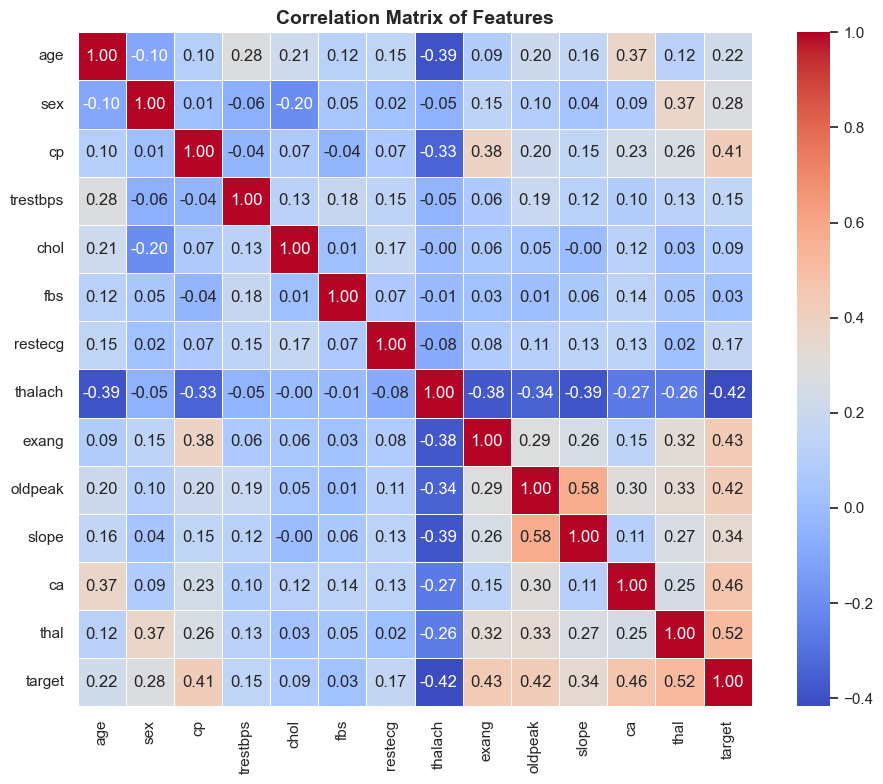

In [5]:
print("\n--- 1.5 Correlation Matrix ---")

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # Display correlation values
    fmt=".2f",         # Round to 2 decimal places
    cmap="coolwarm",   # Color palette
    square=True,       # Keep cells squared
    linewidths=0.5     # Light gridlines for readability
)
plt.title("Correlation Matrix of Features", fontsize=14, weight="bold")
plt.tight_layout()
plt.savefig("step1_04_correlation_heatmap.png", dpi=150)
plt.show()

##### **Analysis**

- **Strongest with condition**:  
  - **thal (0.52)**, **ca (0.46)**, **oldpeak (0.42)**, **cp (0.41)** -> key predictors.  
- **Negative correlation**: **thalach (-0.42)** -> lower max heart rate = higher risk.  
- **age** and **sex** show mild positive correlation with disease.  
- **No major multicollinearity**, except slight link between **oldpeak–slope (0.58)**.  

-> Highlights: **thal, ca, oldpeak, cp, thalach** are the most influential variables.


#### 1.6. Pre-processing and Train-Test Split

In [6]:
# Define features (X) and target (y)
X = df.drop(columns=["target"])
y = df["target"]

# Stratified split to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,          # 80/20 split
    random_state=42,         # reproducibility
    stratify=y               # keep class balance in both sets
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape:     {X_test.shape}")

# Quick check of class proportions
train_ratio = y_train.value_counts(normalize=True).sort_index().rename({0:"class_0",1:"class_1"})
test_ratio  = y_test.value_counts(normalize=True).sort_index().rename({0:"class_0",1:"class_1"})

print("\nClass proportions (train):")
display(train_ratio.to_frame("ratio"))

print("Class proportions (test):")
display(test_ratio.to_frame("ratio"))



Training set shape: (242, 13)
Test set shape:     (61, 13)

Class proportions (train):


,ratio
target,
class_0,0.541322
class_1,0.458678


Class proportions (test):


,ratio
target,
class_0,0.540984
class_1,0.459016



- **Train set**: 242 samples (≈54% class 0, ≈46% class 1)  
- **Test set**: 61 samples (≈54% class 0, ≈46% class 1)  
- **Split ratio**: 80 / 20 with stratification maintained  

-> Balanced class distribution — no strong imbalance issue detected.


#### 1.7. Create Baseline Model (Logistic Regression)

In [7]:
print("\n--- 1.7. Training Baseline Model (Logistic Regression) ---")

# We create a simple pipeline for the baseline:
# 1. StandardScaler: scales all features.
# 2. LogisticRegression: the model itself.
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the baseline model
pipeline_lr.fit(X_train, y_train)
print("Baseline model trained successfully.")


--- 1.7. Training Baseline Model (Logistic Regression) ---
Baseline model trained successfully.


#### 1.8. Evaluate Baseline Model


--- 1.8. Evaluating Baseline Model ---

--- Baseline Model (Logistic Regression) Performance ---
Accuracy: 0.8689
ROC-AUC Score: 0.9535

Classification Report:
              precision    recall  f1-score   support

   No HD (0)       0.93      0.82      0.87        33
      HD (1)       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Confusion Matrix:


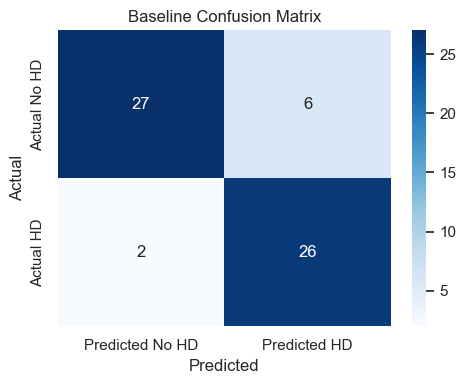

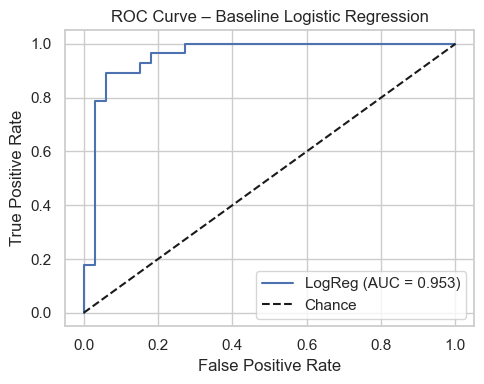

In [8]:
print("\n--- 1.8. Evaluating Baseline Model ---")

# Make predictions on the test set
y_pred_lr = pipeline_lr.predict(X_test)
y_prob_lr = pipeline_lr.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Compute metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"\n--- Baseline Model (Logistic Regression) Performance ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"ROC-AUC Score: {auc_lr:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No HD (0)', 'HD (1)']))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted No HD', 'Predicted HD'],
    yticklabels=['Actual No HD', 'Actual HD']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix')
plt.tight_layout()
plt.savefig('step1_05_baseline_confusion_matrix.png', dpi=150)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc_lr:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Baseline Logistic Regression')
plt.legend()
plt.tight_layout()
plt.savefig('step1_06_baseline_roc_curve.png', dpi=150)
plt.show()

##### Analysis (Logistic Regression)

The baseline **Logistic Regression** model performs very well:

- **Accuracy:** 0.87  
- **ROC-AUC:** 0.95 -> excellent discriminative ability.  
- **Precision/Recall (HD=1):** 0.81 / 0.93  
  - High recall: strong ability to identify HD cases (only 2 missed).  
  - Lower precision: a few false positives (6 mistakes).

**Confusion Matrix Insight:**  
- TN = 27, FP = 6 -> some non-HD cases are incorrectly classified as HD.  
- TP = 26, FN = 2 -> a few real heart disease cases are missed.

**ROC Curve Interpretation:**  
- The curve stays close to the top-left corner → strong sensitivity/specificity trade-off.  
- AUC = 0.953 confirms **robust model separation** between healthy and diseased groups.

-> **Conclusion:** The baseline model is already strong, well-calibrated, and clinically relevant.  
Main improvement path: **tune threshold** to reduce **false positive**.


### Step 1 – Baseline Model: Logistic Regression

The baseline Logistic Regression model achieved **excellent initial performance**, setting a strong benchmark for the next steps.

#### Key Performance (Test Set)
- **Accuracy:** 86.9 %  
- **ROC–AUC:** 0.953  – an almost perfect discriminative ability  
- **Precision (HD = 1):** 0.81 
- **Recall (HD = 1):** 0.93  

---

#### Confusion Matrix Analysis

- **Some False Positives:** The model incorrectly classified 6 non-HD samples as HD (top-right cell).  
  This indicates that the model slightly over-predicts the HD class, leading to unnecessary alerts on non-HD cases.

- **Few False Negatives:** Only 2 actual HD cases were missed (bottom-left cell).  
  These represent instances where the model failed to detect HD, which is generally the most critical error depending on the application context.


---

#### ROC Curve and Global Performance

The ROC curve rises steeply towards the top-left corner, confirming **strong discrimination** between positive and negative cases.  
An **AUC of 0.953** indicates that the model correctly ranks a random sick patient ahead of a healthy one **95 % of the time**.

---

#### Summary and Next Objective
This baseline model already provides **remarkable accuracy and reliability**, proving that the dataset contains strong predictive patterns.  
However, the **main limitation** lies in its ability to identify all heart-disease cases (Recall = 0.82).  

For **Step 2**, the goal is therefore not only to maintain the current AUC and precision but also to **improve the Recall** — that is, to **reduce the number of missed heart-disease patients** without introducing false positives.


## Step 2: Standard Models & Optimization

**Objective:**  
This step corresponds to the *“Implementation of Standard Solutions”* and *“Improving the Standard Solution”* stages of the ESILV ML guidelines.  
The main objective is to compare the strong baseline `LogisticRegression` model with more complex algorithms and identify whether additional complexity brings real value.

We will focus on two established classifiers:
1. **`RandomForestClassifier`** – a robust *ensemble model* based on multiple decision trees.
2. **`XGBClassifier`** – an *advanced gradient boosting model* known for its high predictive power.

Each model will be:
- trained and evaluated on the same train/test split for fairness,
- compared using identical metrics (*Accuracy, Recall, F1, ROC–AUC*),
- and optimized through **hyperparameter tuning** with `GridSearchCV`.

**Specific challenge:**  
The goal is not only to exceed the baseline **ROC–AUC score of 0.953**,  
but, more importantly, to **reduce the number of False Negatives and False Positives**.


#### 2.1. Imports for Step 2

In [29]:
# We only import the *new* libraries required for this step.
# All core dependencies (pandas, numpy, sklearn.model_selection, etc.) are already available from Step 1.

# Scikit-learn: models, preprocessing, metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

# XGBoost: gradient boosting algorithm
import xgboost as xgb

# Scikit-learn: hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Utilities
from time import perf_counter
import joblib
import os

print("New libraries for Step 2 imported successfully.")


New libraries for Step 2 imported successfully.


#### 2.2 Advanced Preprocessing Pipeline

In Step 1, we applied a `StandardScaler` to all features, which was acceptable for a baseline but not methodologically correct for a professional project.  
A robust and interpretable preprocessing pipeline should treat continuous and categorical variables differently.

**Problem:**  
Scaling categorical variables such as `sex` (0 or 1) into values like `-1.2` or `0.8` is *mathematically meaningless* and can distort the model’s interpretation of those features.

**Solution:**  
We use a `ColumnTransformer` to define two distinct preprocessing strategies:
1. **Continuous features** (e.g., `age`, `chol`, `thalach`, `oldpeak`) → will be standardized using `StandardScaler`.  
2. **Categorical features** (e.g., `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`) → will be passed through unchanged, since they are already encoded as integers.

This approach ensures both **numerical correctness** and **interpretability**, which is essential for Step 3 (SHAP explainability).  
By keeping categorical features in their original form (e.g., `sex = 1` still means “male”), we preserve their clinical meaning and guarantee that future model explanations remain understandable.

In [43]:
# Create the ColumnTransformer

# This preprocessor applies StandardScaler ONLY to continuous features
# and passes through categorical ones unchanged.
# The continuous_features and categorical_features lists are already defined from Step 1.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),   # Scale continuous variables
        ('cat', 'passthrough', categorical_features)      # Leave categorical variables untouched
    ],
    remainder='passthrough'  # Ensures no column is dropped accidentally
)

# Quick test: fit and transform a few rows to verify the output shape
sample_transformed = preprocessor.fit_transform(X_train.head(3))
print(f"Transformed sample shape: {sample_transformed.shape}")
print("ColumnTransformer created and verified successfully.")

Transformed sample shape: (3, 13)
ColumnTransformer created and verified successfully.


The `ColumnTransformer` is now correctly configured to handle continuous and categorical data separately.  
Continuous features are standardized to improve model convergence and comparability, while categorical features are kept in their original encoded form to maintain interpretability.  
This ensures that downstream models (Random Forest, XGBoost, Logistic Regression) receive consistent and meaningful inputs.

#### 2.3 Model Benchmarking (Default Parameters)

In this step, we train and evaluate three models using their **default parameters** to compare their natural performance.  
Each model uses the same preprocessing pipeline (`ColumnTransformer`) to ensure a fair comparison.

The objective is to identify which model performs best *before tuning*, focusing on:
- Overall performance (ROC–AUC, Accuracy, Recall, F1)
- Clinical reliability (minimizing both False Negatives and False Positives)

This initial benchmark will show whether more complex models like Random Forest or XGBoost can outperform the strong Logistic Regression baseline.

--- Starting Model Benchmarking (Default Params) ---
Training lr...
Training rf...
Training xgb...
--- Benchmarking Complete ---

--- Initial Model Comparison (Default Parameters) ---


,Model,ROC_AUC,Accuracy,Precision,Recall,F1,FP,FN
0,RF,0.959,0.918,0.871,0.964,0.915,4,1
1,LR,0.959,0.869,0.812,0.929,0.867,6,2
2,XGB,0.919,0.852,0.788,0.929,0.852,7,2


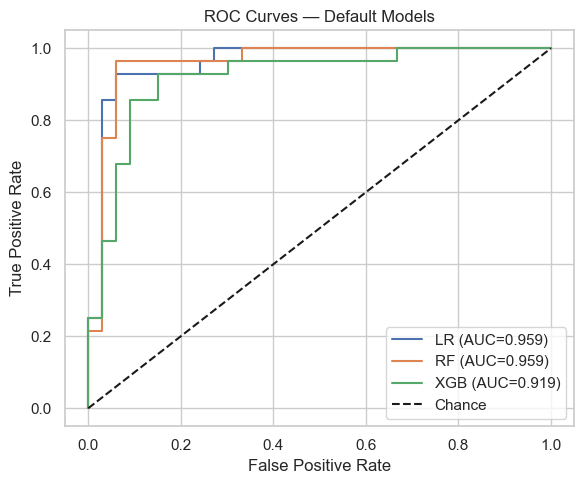

In [44]:
# Define pipelines (preprocessor + model) 
pipelines = {
    "lr": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(random_state=42, solver="liblinear", max_iter=1000))
    ]),
    "rf": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestClassifier(random_state=42))
    ]),
    "xgb": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", xgb.XGBClassifier(
            random_state=42,
            eval_metric="logloss"  # silence warnings; does not change default optimization
        ))
    ])
}

print("--- Starting Model Benchmarking (Default Params) ---")
results = []
roc_curves = {}

for name, pipe in pipelines.items():
    print(f"Training {name}...")
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)
    # Probabilities (for AUC/ROC); if not available, skip AUC
    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc)
    else:
        y_proba, auc = None, float("nan")

    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    # Confusion matrix -> [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results.append({
        "Model": name.upper(),
        "ROC_AUC": round(auc, 3),
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3),
        "FP": int(fp),
        "FN": int(fn)
    })

print("--- Benchmarking Complete ---")

# --- Display results as a sorted table ---
results_df = pd.DataFrame(results).sort_values(
    by=["ROC_AUC", "Recall", "F1"], ascending=False
).reset_index(drop=True)

print("\n--- Initial Model Comparison (Default Parameters) ---")
display(results_df)

# --- Plot combined ROC curves ---

plt.figure(figsize=(6, 5))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name.upper()} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Default Models")
plt.legend()
plt.tight_layout()
plt.savefig("step2_01_benchmark_roc_curves.png", dpi=150)
plt.show()


#### Analysis - 
All three models show strong discrimination (ROC–AUC ≈ 0.91–0.95). 
- **Logistic Regression (LR)**: AUC 0.959, 6 FP, 2 FN 
- **XGBoost (XGB)**: AUC 0.919, 7 FP, 2 FN 
- **Random Forest (RF)**: AUC 0.959, 4 FP, 1 FN -> best model. 

**Takeaway:** 
Random Forest is the clear winner, delivering the **highest accuracy**, **best F1-score**, and **fewest classification errors** (especially FN, which are clinically critical). Logistic Regression remains a strong baseline but generates **more false alarms (FP)**. XGBoost would require **hyperparameter tuning** to match the performance of RF or LR.

#### 2.4 Hyperparameter Tuning – Plan (concise)

Goal: **reduce False Positives (FP) while keeping Recall (and FN) stable.**

- **Models to tune:** XGB, LR
- **Method:** `GridSearchCV`, stratified 5-fold.
- **Scoring:** primary = `roc_auc`; secondary = `precision`, `recall`, and FP/FN from the confusion matrix.

- **Search ideas:**
  - **XGB:** `n_estimators`, `max_depth`, `learning_rate`, `subsample`,  
    `colsample_bytree`, `min_child_weight`.
  - **RF:** `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`,  
    optional `class_weight='balanced'` to stabilize FN/FP trade-offs.

- **Post-tuning:** adjust the decision threshold to reduce FP without increasing FN.

- **Champion selection:** best AUC with **lower FP** and **maintained Recall**.  
  


In [ ]:
# 1) LOGISTIC REGRESSION — GridSearchCV
lr_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(
        random_state=42,
        solver="liblinear",
        max_iter=1000
    ))
])

lr_grid = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
    "model__class_weight": [None, "balanced"]
}

lr_gs = GridSearchCV(
    lr_pipe,
    lr_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

lr_gs.fit(X_train, y_train)
print("LR best params:", lr_gs.best_params_,
      "| CV AUC:", round(lr_gs.best_score_, 3))


# --- 2) XGBOOST — GridSearchCV ---
xgb_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        tree_method="hist"
    ))
])

xgb_grid = {
    "model__n_estimators": [300, 600, 900],
    "model__max_depth": [2, 3, 4],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__min_child_weight": [1, 3],
    # Optionnel pour contrôler la complexité :
    # "model__gamma": [0, 1],
}

xgb_gs = GridSearchCV(
    xgb_pipe,
    xgb_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

xgb_gs.fit(X_train, y_train)
print("XGB best params:", xgb_gs.best_params_,
      "| CV AUC:", round(xgb_gs.best_score_, 3))



# 3) EVALUATION on test (threshold = 0.5)
rows = []

for name, est in [
    ("LR_tuned", lr_gs.best_estimator_),
    ("XGB_tuned", xgb_gs.best_estimator_),
]:
    y_proba = est.predict_proba(X_test)[:, 1]
    y_pred  = (y_proba >= 0.5).astype(int)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_proba)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    rows.append({
        "Model": name,
        "AUC": round(auc, 3),
        "Acc": round(acc, 3),
        "Prec": round(prec, 3),
        "Rec": round(rec, 3),
        "F1": round(f1, 3),
        "FP": int(fp),
        "FN": int(fn)
    })

tuned_df = pd.DataFrame(rows).sort_values(
    by=["AUC", "Rec", "F1"],
    ascending=False
).reset_index(drop=True)

display(tuned_df)


LR best params: {'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l1'} | CV AUC: 0.889
XGB best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_child_weight': 3, 'model__n_estimators': 300, 'model__subsample': 0.8} | CV AUC: 0.882


,Model,AUC,Acc,Prec,Rec,F1,FP,FN
0,LR_tuned,0.948,0.869,0.812,0.929,0.867,6,2
1,XGB_tuned,0.943,0.869,0.812,0.929,0.867,6,2


In [47]:
# Repartir de tes meilleurs pipelines déjà fit par GridSearch
best_lr  = lr_gs.best_estimator_         # Pipeline(preprocessor, LogisticRegression(...))
best_xgb = xgb_gs.best_estimator_        # Pipeline(preprocessor, XGBClassifier(...))

# VotingClassifier : LR + XGB (soft voting)
voting_soft = VotingClassifier(
    estimators=[
        ("lr", best_lr),
        ("xgb", best_xgb),
    ],
    voting="soft",  # moyenne des probabilités
    n_jobs=-1
)

# Fit Voting sur le train
voting_soft.fit(X_train, y_train)

# Fonction d'évaluation générique
def eval_model(name, model, X_test, y_test):
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    y_pred = model.predict(X_test)
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, proba) if proba is not None else float("nan"),
    }
    cm = confusion_matrix(y_test, y_pred)
    return metrics, cm

# Évaluation des modèles
metrics_lr,   cm_lr   = eval_model("LR",   best_lr,  X_test, y_test)
metrics_xgb,  cm_xgb  = eval_model("XGB",  best_xgb, X_test, y_test)
metrics_vote, cm_vote = eval_model("Voting (LR+XGB, soft)", voting_soft, X_test, y_test)


In [48]:
def inference_time_ms_per_sample(model, X, n_repeats=20):
    # réchauffe
    _ = model.predict(X[:10])
    start = perf_counter()
    for _ in range(n_repeats):
        _ = model.predict(X)
    elapsed = perf_counter() - start
    return (elapsed / (n_repeats * len(X))) * 1000.0


def model_size_mb(model, path):
    joblib.dump(model, path)
    size_mb = os.path.getsize(path) / (1024*1024)
    os.remove(path)
    return size_mb


# --- Compute inference time ---
metrics_lr["InfTime(ms/sample)"]   = inference_time_ms_per_sample(best_lr,   X_test)
metrics_xgb["InfTime(ms/sample)"]  = inference_time_ms_per_sample(best_xgb,  X_test)
metrics_vote["InfTime(ms/sample)"] = inference_time_ms_per_sample(voting_soft, X_test)

# --- Compute model size ---
metrics_lr["Size(MB)"]   = model_size_mb(best_lr,   "lr_best.joblib")
metrics_xgb["Size(MB)"]  = model_size_mb(best_xgb,  "xgb_best.joblib")
metrics_vote["Size(MB)"] = model_size_mb(voting_soft, "vote_lr_xgb.joblib")


In [49]:

comparison = pd.DataFrame([metrics_lr, metrics_xgb, metrics_vote])
comparison["Interpretability"] = [
    "Moyenne", 
    "Faible", 
    "Faible"
]

display(comparison.sort_values(by=["ROC_AUC","F1","Recall"], ascending=False).round(3))
print(comparison.shape)
print(comparison)




,Model,Accuracy,Precision,Recall,F1,ROC_AUC,InfTime(ms/sample),Size(MB),Interpretability
2,"Voting (LR+XGB, soft)",0.869,0.812,0.929,0.867,0.951,0.092,0.573,Faible
0,LR,0.869,0.812,0.929,0.867,0.948,0.037,0.003,Moyenne
1,XGB,0.869,0.812,0.929,0.867,0.943,0.117,0.284,Faible


(3, 9)
                   Model  Accuracy  Precision    Recall        F1   ROC_AUC  \
0                     LR  0.868852     0.8125  0.928571  0.866667  0.948052   
1                    XGB  0.868852     0.8125  0.928571  0.866667  0.942641   
2  Voting (LR+XGB, soft)  0.868852     0.8125  0.928571  0.866667  0.951299   

   InfTime(ms/sample)  Size(MB) Interpretability  
0            0.036617  0.003156          Moyenne  
1            0.117341  0.284404           Faible  
2            0.092281  0.573070           Faible  


#### 2.5 Final Comparison: Random Forest vs Tuned Models


--- Final Model Comparison ---


,Model,ROC_AUC,Accuracy,Precision,Recall,F1,FP,FN
0,RF (default),0.959,0.918,0.871,0.964,0.915,4,1
1,LR (tuned),0.948,0.869,0.812,0.929,0.867,6,2
2,XGB (tuned),0.943,0.869,0.812,0.929,0.867,6,2


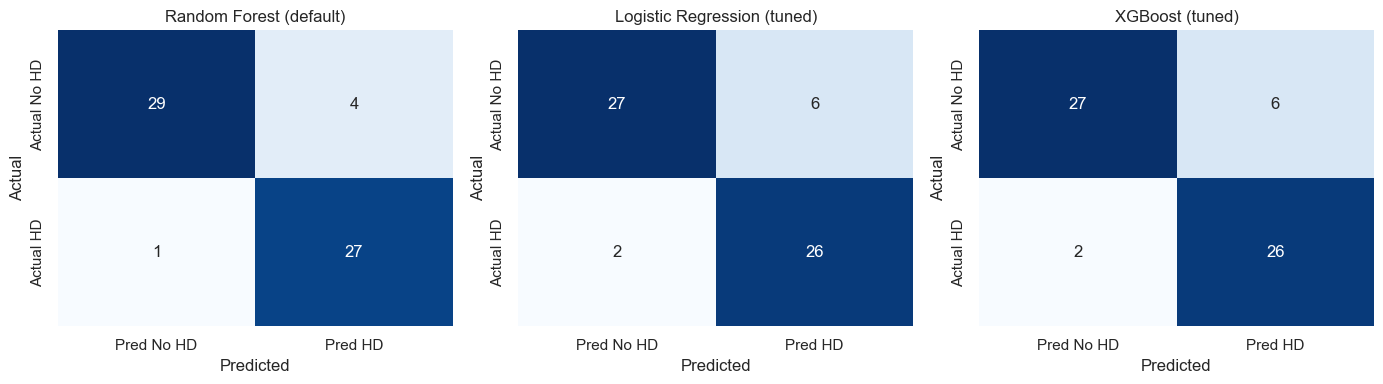

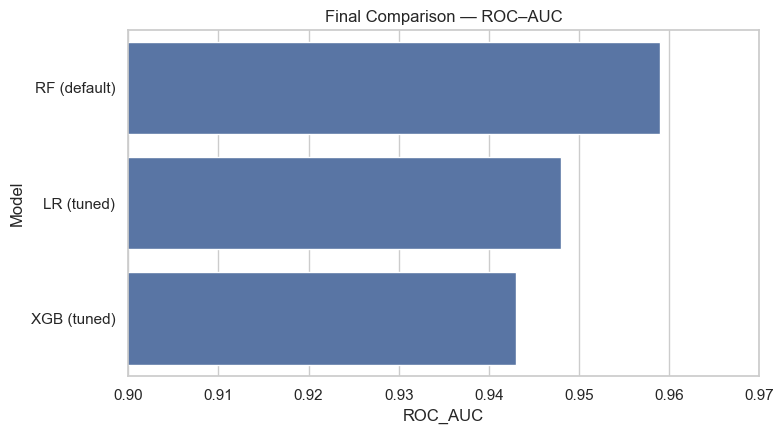

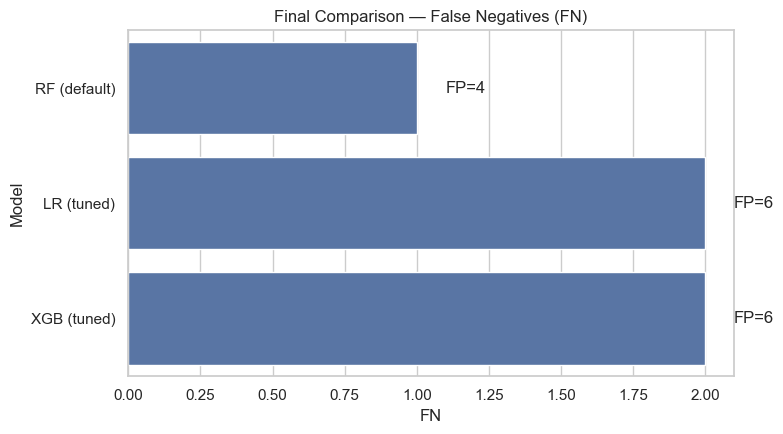

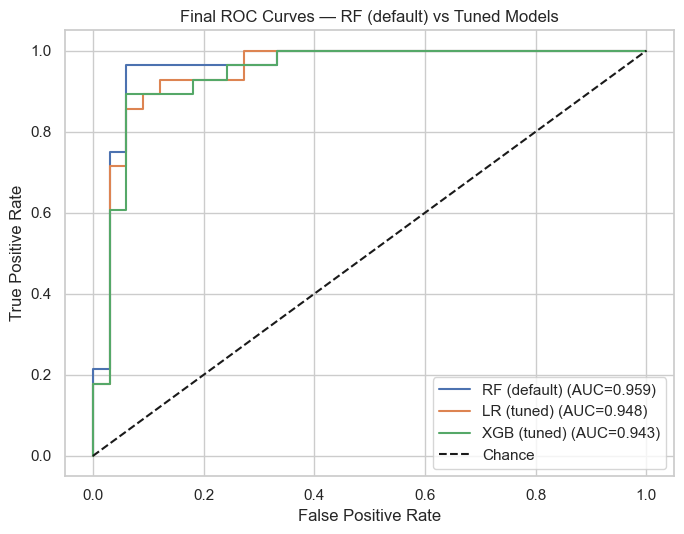

In [51]:
# Pack the three champions we want to compare
# RF = modèle par défaut (baseline fort)
final_models = {
    "RF (default)": pipelines["rf"],           # RandomForest baseline (non tuné)
    "LR (tuned)":   lr_gs.best_estimator_,     # Logistic Regression tunée
    "XGB (tuned)":  xgb_gs.best_estimator_     # XGBoost tuné
}

# Recompute metrics consistently
rows = []
roc_curves_final = {}

for name, model in final_models.items():
    # Probabilities for ROC/AUC
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred  = (y_proba > 0.5).astype(int)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    rows.append({
        "Model": name,
        "ROC_AUC": round(auc, 3),
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3),
        "FP": int(fp),
        "FN": int(fn)
    })

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves_final[name] = (fpr, tpr, auc)

final_results_df = pd.DataFrame(rows).sort_values(
    by=["ROC_AUC", "Recall", "F1"], ascending=False
).reset_index(drop=True)

print("\n--- Final Model Comparison ---")
display(final_results_df)

# Confusion matrices for the three models
models_to_plot = {
    "Random Forest (default)": pipelines["rf"],
    "Logistic Regression (tuned)": lr_gs.best_estimator_,
    "XGBoost (tuned)": xgb_gs.best_estimator_
}

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, (name, model) in zip(axes, models_to_plot.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False,
        xticklabels=["Pred No HD", "Pred HD"],
        yticklabels=["Actual No HD", "Actual HD"]
    )
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.savefig("step2_02_confusion_matrices.png", dpi=150)
plt.show()

# Plot 1: ROC–AUC (higher is better)
plt.figure(figsize=(8, 4.5))
sns.barplot(x="ROC_AUC", y="Model", data=final_results_df)
plt.title("Final Comparison — ROC–AUC")
plt.xlim(0.90, 0.97)  # zoom on high scores (adapter si besoin)
plt.tight_layout()
plt.savefig("step2_final_auc_bars.png", dpi=150)
plt.show()

# Plot 2: False Negatives (lower is better) — and show FP on bars
plt.figure(figsize=(8, 4.5))
ax = sns.barplot(x="FN", y="Model", data=final_results_df)
plt.title("Final Comparison — False Negatives (FN)")
# annotate FP next to each bar for clinical context
for i, row in final_results_df.iterrows():
    ax.text(row["FN"] + 0.1, i, f"FP={row['FP']}", va="center")
plt.tight_layout()
plt.savefig("step2_final_fn_bars.png", dpi=150)
plt.show()

# Plot 3: Combined ROC curves
plt.figure(figsize=(7, 5.5))
for name, (fpr, tpr, auc) in roc_curves_final.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Final ROC Curves — RF (default) vs Tuned Models")
plt.legend()
plt.tight_layout()
plt.savefig("step2_final_roc_curves.png", dpi=150)
plt.show()
